# Classification of Heart Disease Diagnosis From Predictor Variables

<font color = purple>
    
## Introduction
    
<font color = black>

A slow and painful spiral culminating in the malfunction of the most crucial organ in the human body: heart disease. Using heart disease data provided by the Cleveland Clinic Foundation, the aim of this project is to create a k-nearest neighbors algorithm which is able to classify the diagnosis of heart disease based on 5 predictor variables.

<font color = purple>

## Preliminary Exploratory Data Analysis

Firstly, libraries must be imported, and the data needs to be read by the R program.

In [1]:
# import libraries needed
library(tidyverse)
library(repr)
library(rvest)
library(tidymodels)
library(cowplot)
library(ggplot2)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ re

In [2]:
# read the dataset for heart disease

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
heart_data <- as_tibble(read.table(url, sep = ",", header = FALSE, na.strings = "?"))

# display the data
heart_data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0


It is important to note that the column V14 refers to a patient's heart disease diagnosis. It is a non-continuous variable, consisting of values 1-4, with 1 representing a negative diagnosis, while 2-4 represents a positive diagnosis. 

<font color = blue>

### *Cleaning Data*

In [3]:
# add column names
colnames(heart_data) <- c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholesterol", "fasting_blood_sugar", "resting_electrocardiographic", "max_heart_rate", "exercise_induced_angina", "depression", "peak_exercise", "number_vessels", "normality", "heart_disease_diagnosis")

head(heart_data)

age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiographic,max_heart_rate,exercise_induced_angina,depression,peak_exercise,number_vessels,normality,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


Not all columns will be used, as this classification model will only use predictor variables that are continuous.

In [4]:
# only keep select columns
heart_data <- heart_data |>
    select(age, resting_blood_pressure, cholesterol, max_heart_rate, depression, heart_disease_diagnosis)

heart_data

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
63,145,233,150,2.3,0
67,160,286,108,1.5,2
67,120,229,129,2.6,1
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,1.2,3
57,130,236,174,0.0,1
38,138,175,173,0.0,0


Additionally, the heart disease diagnosis column will return either positive or negative, rather than numbers from 1-4, in order to improve understandability. 

In [5]:
# mutate column 14 to be more understandable by readers
heart_data <- heart_data |>
    mutate(heart_disease_diagnosis = case_when(heart_disease_diagnosis == 0 ~ "negative",
                                heart_disease_diagnosis == 1 ~ "positive",
                                heart_disease_diagnosis == 2 ~ "positive",
                                heart_disease_diagnosis == 3 ~ "positive",
                                heart_disease_diagnosis == 4 ~ "positive"))
heart_data

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,145,233,150,2.3,negative
67,160,286,108,1.5,positive
67,120,229,129,2.6,positive
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,1.2,positive
57,130,236,174,0.0,positive
38,138,175,173,0.0,negative


<font color = purple>

## Preliminary Exploratory Data Analysis
 
<font color = blue>

### *Splitting the Data*

<font color = black>

Exploratory data analysis will only be performed on the training data set, thus, 75% of the data will be in the training set, while the other 25% will be used as the testing set. 
    
The seed set will remain constant throughout the entirety of the project.

In [6]:
set.seed(9898)

# split into testing and training data
heart_data_split <- initial_split(heart_data, prop = 0.75, strata = heart_disease_diagnosis)
heart_data_training_set <- training(heart_data_split)
heart_data_testing_set <- testing(heart_data_split)

In [7]:
# display training and testing data sets
heart_data_training_set
heart_data_testing_set

age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,145,233,150,2.3,negative
37,130,250,187,3.5,negative
41,130,204,172,1.4,negative
⋮,⋮,⋮,⋮,⋮,⋮
44,120,169,144,2.8,positive
63,140,187,144,4.0,positive
57,130,236,174,0.0,positive


age,resting_blood_pressure,cholesterol,max_heart_rate,depression,heart_disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
67,160,286,108,1.5,positive
56,130,256,142,0.6,positive
52,172,199,162,0.5,negative
⋮,⋮,⋮,⋮,⋮,⋮
45,110,264,132,1.2,positive
68,144,193,141,3.4,positive
57,130,131,115,1.2,positive


<font color = blue>

### *Number of Observations in Each Class*

<font color = black>
    
We will compute the number of observations in the two classification classes, to gain an idea as to how the data is distributed.

In [8]:
# number of observations in each class for prediction variables
diagnoses_distributions <- heart_data_training_set |>
    group_by(heart_disease_diagnosis) |>
    summarize(count = n())

diagnoses_distributions

heart_disease_diagnosis,count
<chr>,<int>
negative,123
positive,104


The number of negative and positive diagnoses are relatively similar, meaning that our results are less influenced by the majority of a certain class.

<font color = blue>

### *Missing Data*

In [9]:
# count rows with missing data
missing_data <- sum(is.na(heart_data_training_set $ age)) |>
    sum(is.na(heart_data_training_set $ resting_blood_pressure)) |>
    sum(is.na(heart_data_training_set $ cholesterol)) |>
    sum(is.na(heart_data_training_set $ max_heart_rate)) |>
    sum(is.na(heart_data_training_set $ depression)) |>
    sum(is.na(heart_data_training_set $ heart_disease_diagnosis))

missing_data

[1] 0

As shown above, there is no missing data which may influence classification predictions in the training set.

<font color = blue>

### *Means of Predictor Variables*

In [10]:
# find the mean of each variable used for predictions
heart_data_mean_values <- heart_data_training_set |>
    summarize(across(age:depression, mean))

heart_data_mean_values

age,resting_blood_pressure,cholesterol,max_heart_rate,depression
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.44053,131.3833,248.1542,150.0881,1.103084


<font color = blue>

### *Visualizing Data*
    
<font color = orange>
    
**Predictor Variables vs Heart Disease Classification**
   
<font color = black>
    
Each predictor variable will be along the x axis, while the percentage of positive diagnoses is along the y axis. 

In [11]:
sort_age_diagnosis <- heart_data_training_set |>
    select(age, heart_disease_diagnosis) |>
    group_by(age, heart_disease_diagnosis) |>
    summarize(count = n()) |>
    pivot_wider(names_from = heart_disease_diagnosis, 
                values_from = count)

age_vs_diagnosis_plot <- sort_age_diagnosis |>
    replace(is.na(sort_age_diagnosis), 0) |>
    mutate(total = negative + positive) |>
    mutate(percent_positive = positive/total*100) |>
    ggplot(aes(x = age, y = percent_positive, fill = "red")) +
    geom_bar(stat = "identity", width = 0.6) +
    labs(x = "Age (Years)", y = "Percentage of Positive Diagnoses") +
    theme(text = element_text(size = 15))

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.


In [12]:
sort_resting_blood_pressure_diagnosis <- heart_data_training_set |>
    select(resting_blood_pressure, heart_disease_diagnosis) |>
    group_by(resting_blood_pressure, heart_disease_diagnosis) |>
    summarize(count = n()) |>
    pivot_wider(names_from = heart_disease_diagnosis, 
                values_from = count)

resting_blood_pressure_vs_diagnosis_plot <- sort_resting_blood_pressure_diagnosis |>
    replace(is.na(sort_resting_blood_pressure_diagnosis), 0) |>
    mutate(total = negative + positive) |>
    mutate(percent_positive = positive/total*100) |>
    ggplot(aes(x = resting_blood_pressure, y = percent_positive, fill = "red")) +
    geom_bar(stat = "identity", width = 1.5) +
    labs(x = "Resting Blood Pressure (mm Hg)", y = "Percentage of Positive Diagnoses") +
    theme(text = element_text(size = 15))

`summarise()` has grouped output by 'resting_blood_pressure'. You can override
using the `.groups` argument.


In [13]:
sort_cholesterol_diagnosis <- heart_data_training_set |>
    select(cholesterol, heart_disease_diagnosis) |>
    group_by(cholesterol, heart_disease_diagnosis) |>
    summarize(count = n()) |>
    pivot_wider(names_from = heart_disease_diagnosis, 
                values_from = count)

cholesterol_vs_diagnosis_plot <- sort_cholesterol_diagnosis |>
    replace(is.na(sort_cholesterol_diagnosis), 0) |>
    mutate(total = negative + positive) |>
    mutate(percent_positive = positive/total*100) |>
    ggplot(aes(x = cholesterol, y = percent_positive, fill = "red")) +
    geom_bar(stat = "identity", width = 2) +
    labs(x = "Serum Cholesterol (mg/dl)", y = "Percentage of Positive Diagnoses") +
    theme(text = element_text(size = 15))

`summarise()` has grouped output by 'cholesterol'. You can override using the
`.groups` argument.


In [14]:
sort_max_heart_rate_diagnosis <- heart_data_training_set |>
    select(max_heart_rate, heart_disease_diagnosis) |>
    group_by(max_heart_rate, heart_disease_diagnosis) |>
    summarize(count = n()) |>
    pivot_wider(names_from = heart_disease_diagnosis, 
                values_from = count)

max_heart_rate_vs_diagnosis_plot <- sort_max_heart_rate_diagnosis |>
    replace(is.na(sort_max_heart_rate_diagnosis), 0) |>
    mutate(total = negative + positive) |>
    mutate(percent_positive = positive/total*100) |>
    ggplot(aes(x = max_heart_rate, y = percent_positive, fill = "red")) +
    geom_bar(stat = "identity", width = 1) +
    labs(x = "Maximum Heart Rate Achieved (bpm)", y = "Percentage of Positive Diagnoses") +
    theme(text = element_text(size = 15))

`summarise()` has grouped output by 'max_heart_rate'. You can override using
the `.groups` argument.


In [15]:
sort_depression_diagnosis <- heart_data_training_set |>
    select(depression, heart_disease_diagnosis) |>
    group_by(depression, heart_disease_diagnosis) |>
    summarize(count = n()) |>
    pivot_wider(names_from = heart_disease_diagnosis, 
                values_from = count)

depression_vs_diagnosis_plot <- sort_depression_diagnosis |>
    replace(is.na(sort_depression_diagnosis), 0) |>
    mutate(total = negative + positive) |>
    mutate(percent_positive = positive/total*100) |>
    ggplot(aes(x = depression, y = percent_positive, fill = "red")) +
    geom_bar(stat = "identity", width = 0.08) +
    labs(x = "Depression Induced by Exercise Relative to Rest", y = "Percentage of Positive Diagnoses") +
    theme(text = element_text(size = 15))

`summarise()` has grouped output by 'depression'. You can override using the
`.groups` argument.


Warning message:
“position_stack requires non-overlapping x intervals”
Warning message:
“position_stack requires non-overlapping x intervals”


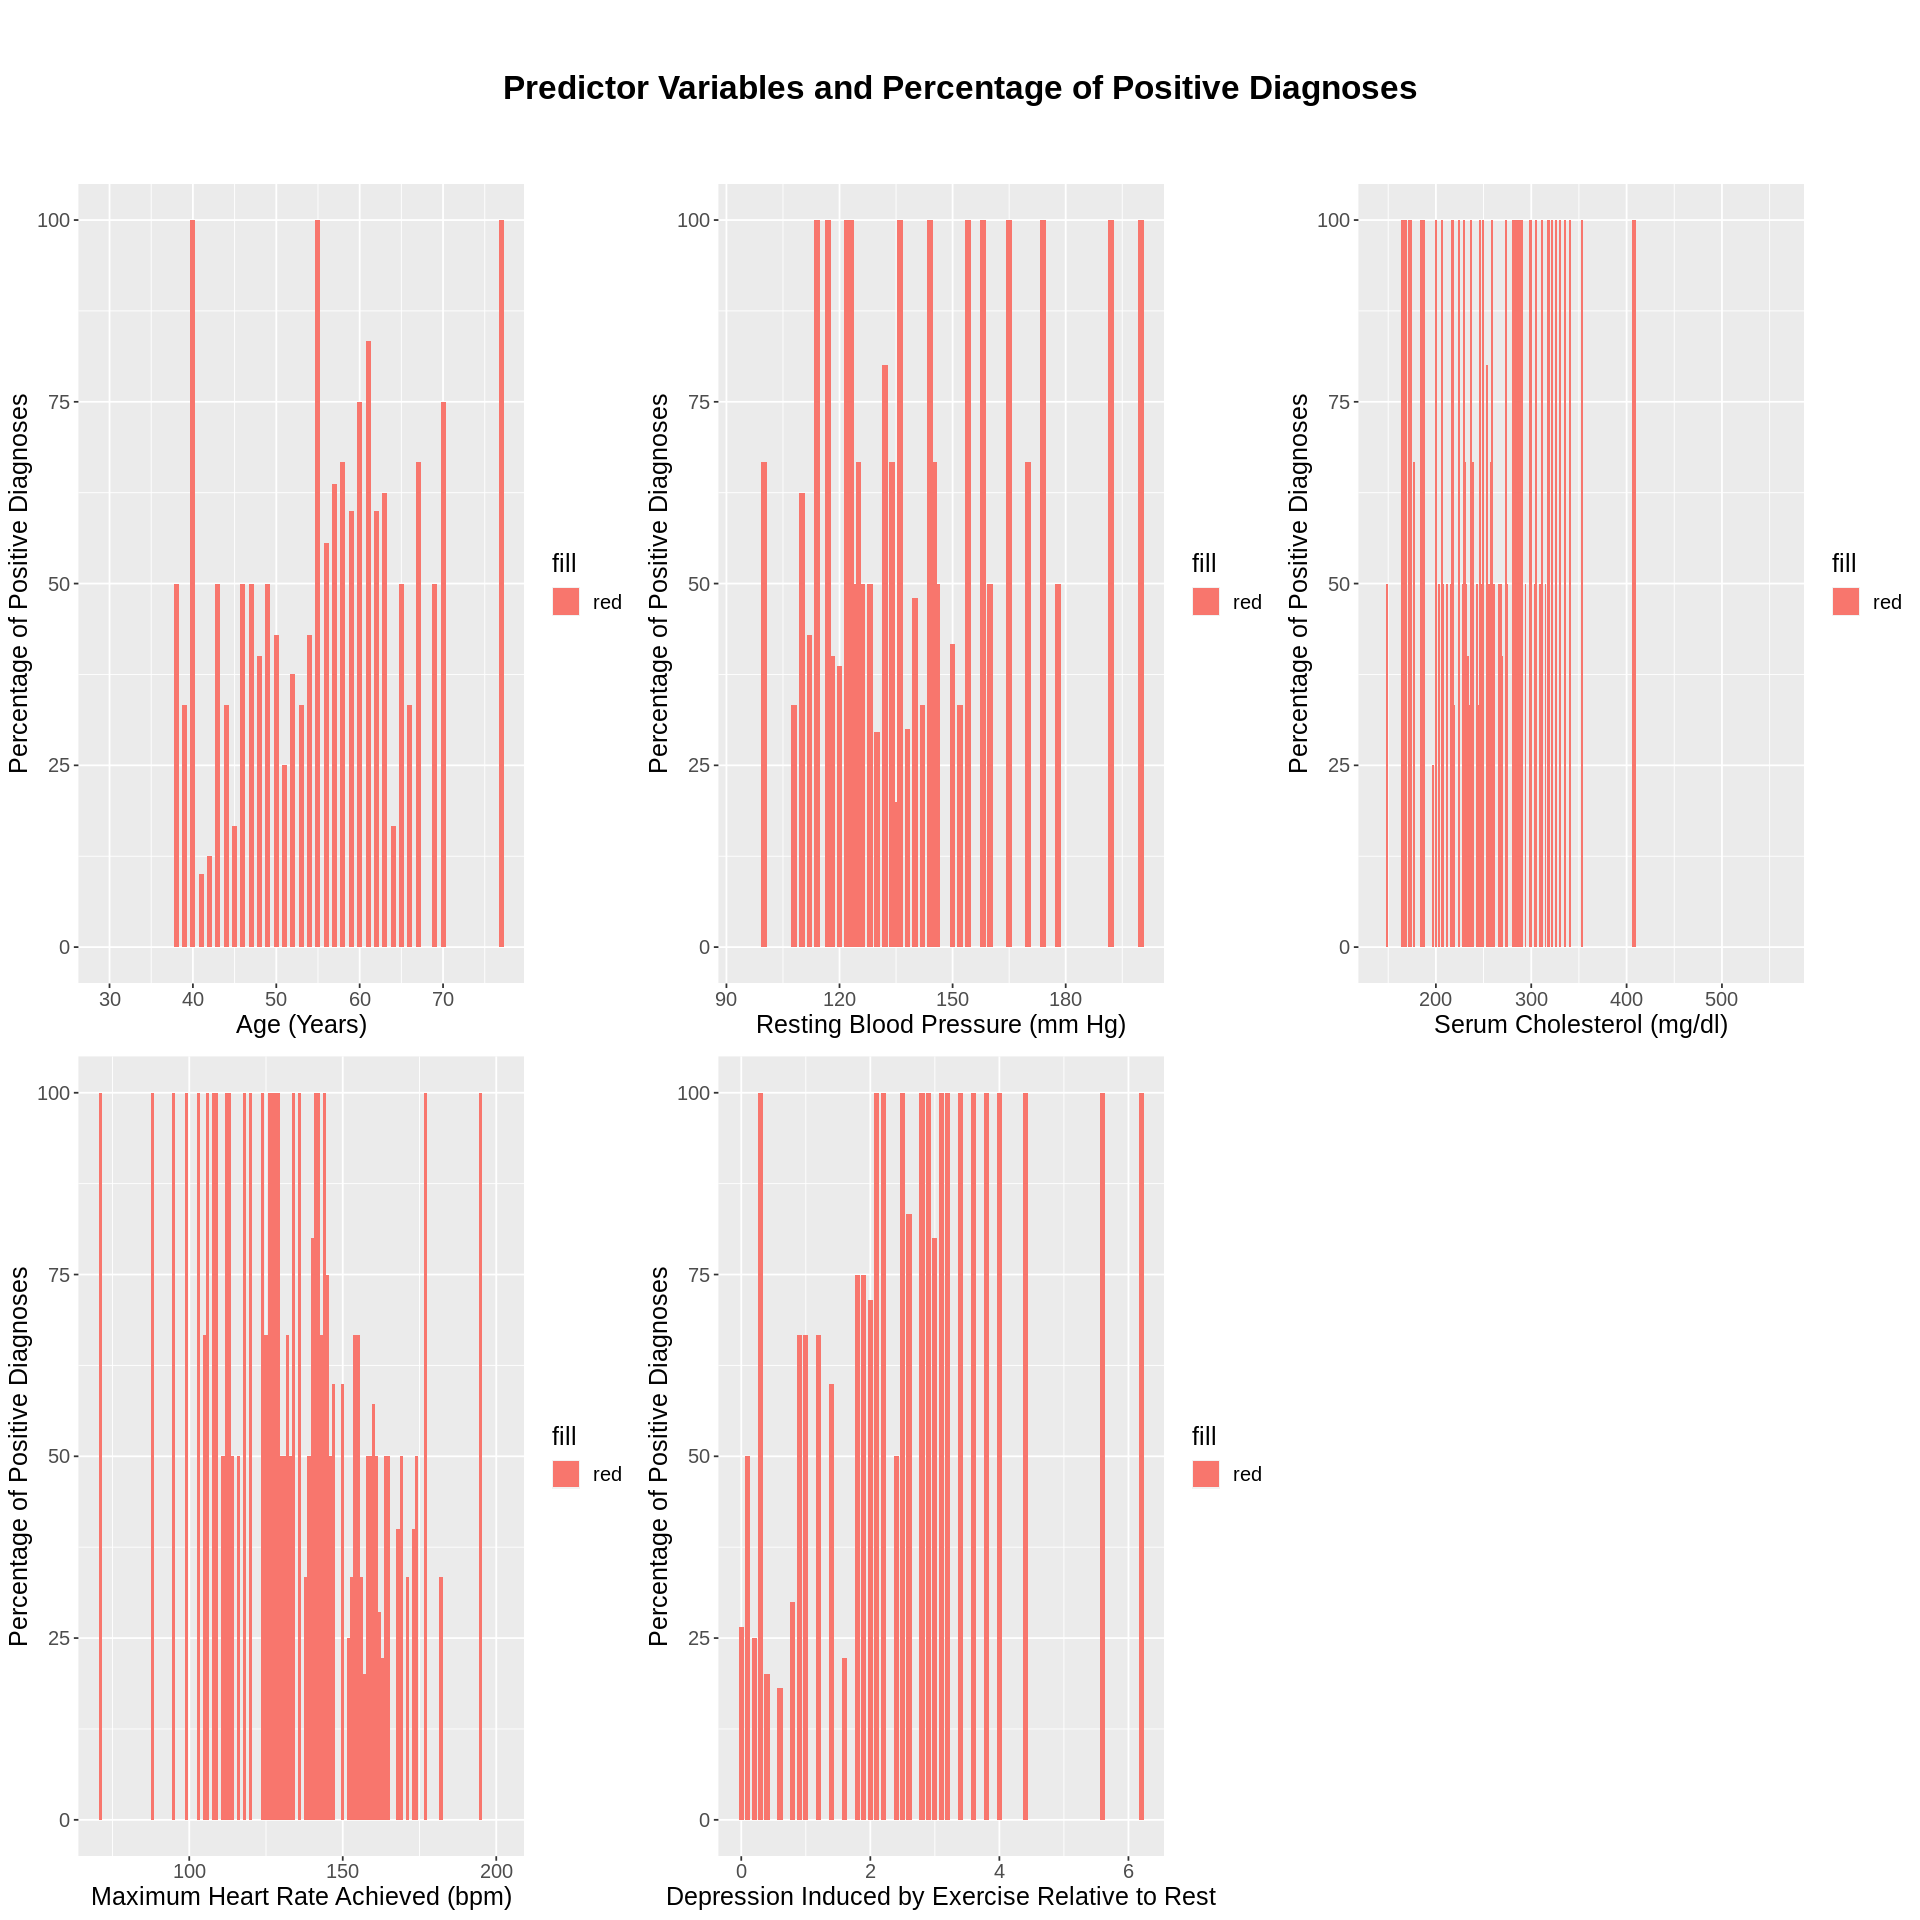

In [16]:
# display all the graphs at once

options(repr.plot.width = 16, repr.plot.height = 16)

# plots <- plot_grid(age_vs_diagnosis_plot, 
#                     resting_blood_pressure_vs_diagnosis_plot, 
#                     cholesterol_vs_diagnosis_plot, 
#                     max_heart_rate_vs_diagnosis_plot, 
#                     depression_vs_diagnosis_plot)

plots <- plot_grid(age_vs_diagnosis_plot, 
                    resting_blood_pressure_vs_diagnosis_plot, 
                    cholesterol_vs_diagnosis_plot, 
                    max_heart_rate_vs_diagnosis_plot, 
                    depression_vs_diagnosis_plot)

title <- ggdraw() +
    draw_label("Predictor Variables and Percentage of Positive Diagnoses", fontface = "bold", size = 20) 

display_plots <- plot_grid(title, plots, ncol = 1, rel_heights = c(0.1, 1))
display_plots

The above 5 bar graphs display the relationship between the percentage of positive diagnoses and each predictor variable.

<font color = orange>
    
**Distribution of Each Predictor Variable**
   
<font color = black>
    
This boxplot displays the distribution of each predictor variable, including the average, and outliers in the training data set. 

In [17]:
# wrangle the dataset
heart_data_training_set_adjusted <- heart_data_training_set |>
    select(-heart_disease_diagnosis) |>
    pivot_longer(cols = age:depression,
                names_to = "variable",
                values_to = "value")

heart_data_training_set_adjusted

variable,value
<chr>,<dbl>
age,63
resting_blood_pressure,145
cholesterol,233
⋮,⋮
cholesterol,236
max_heart_rate,174
depression,0


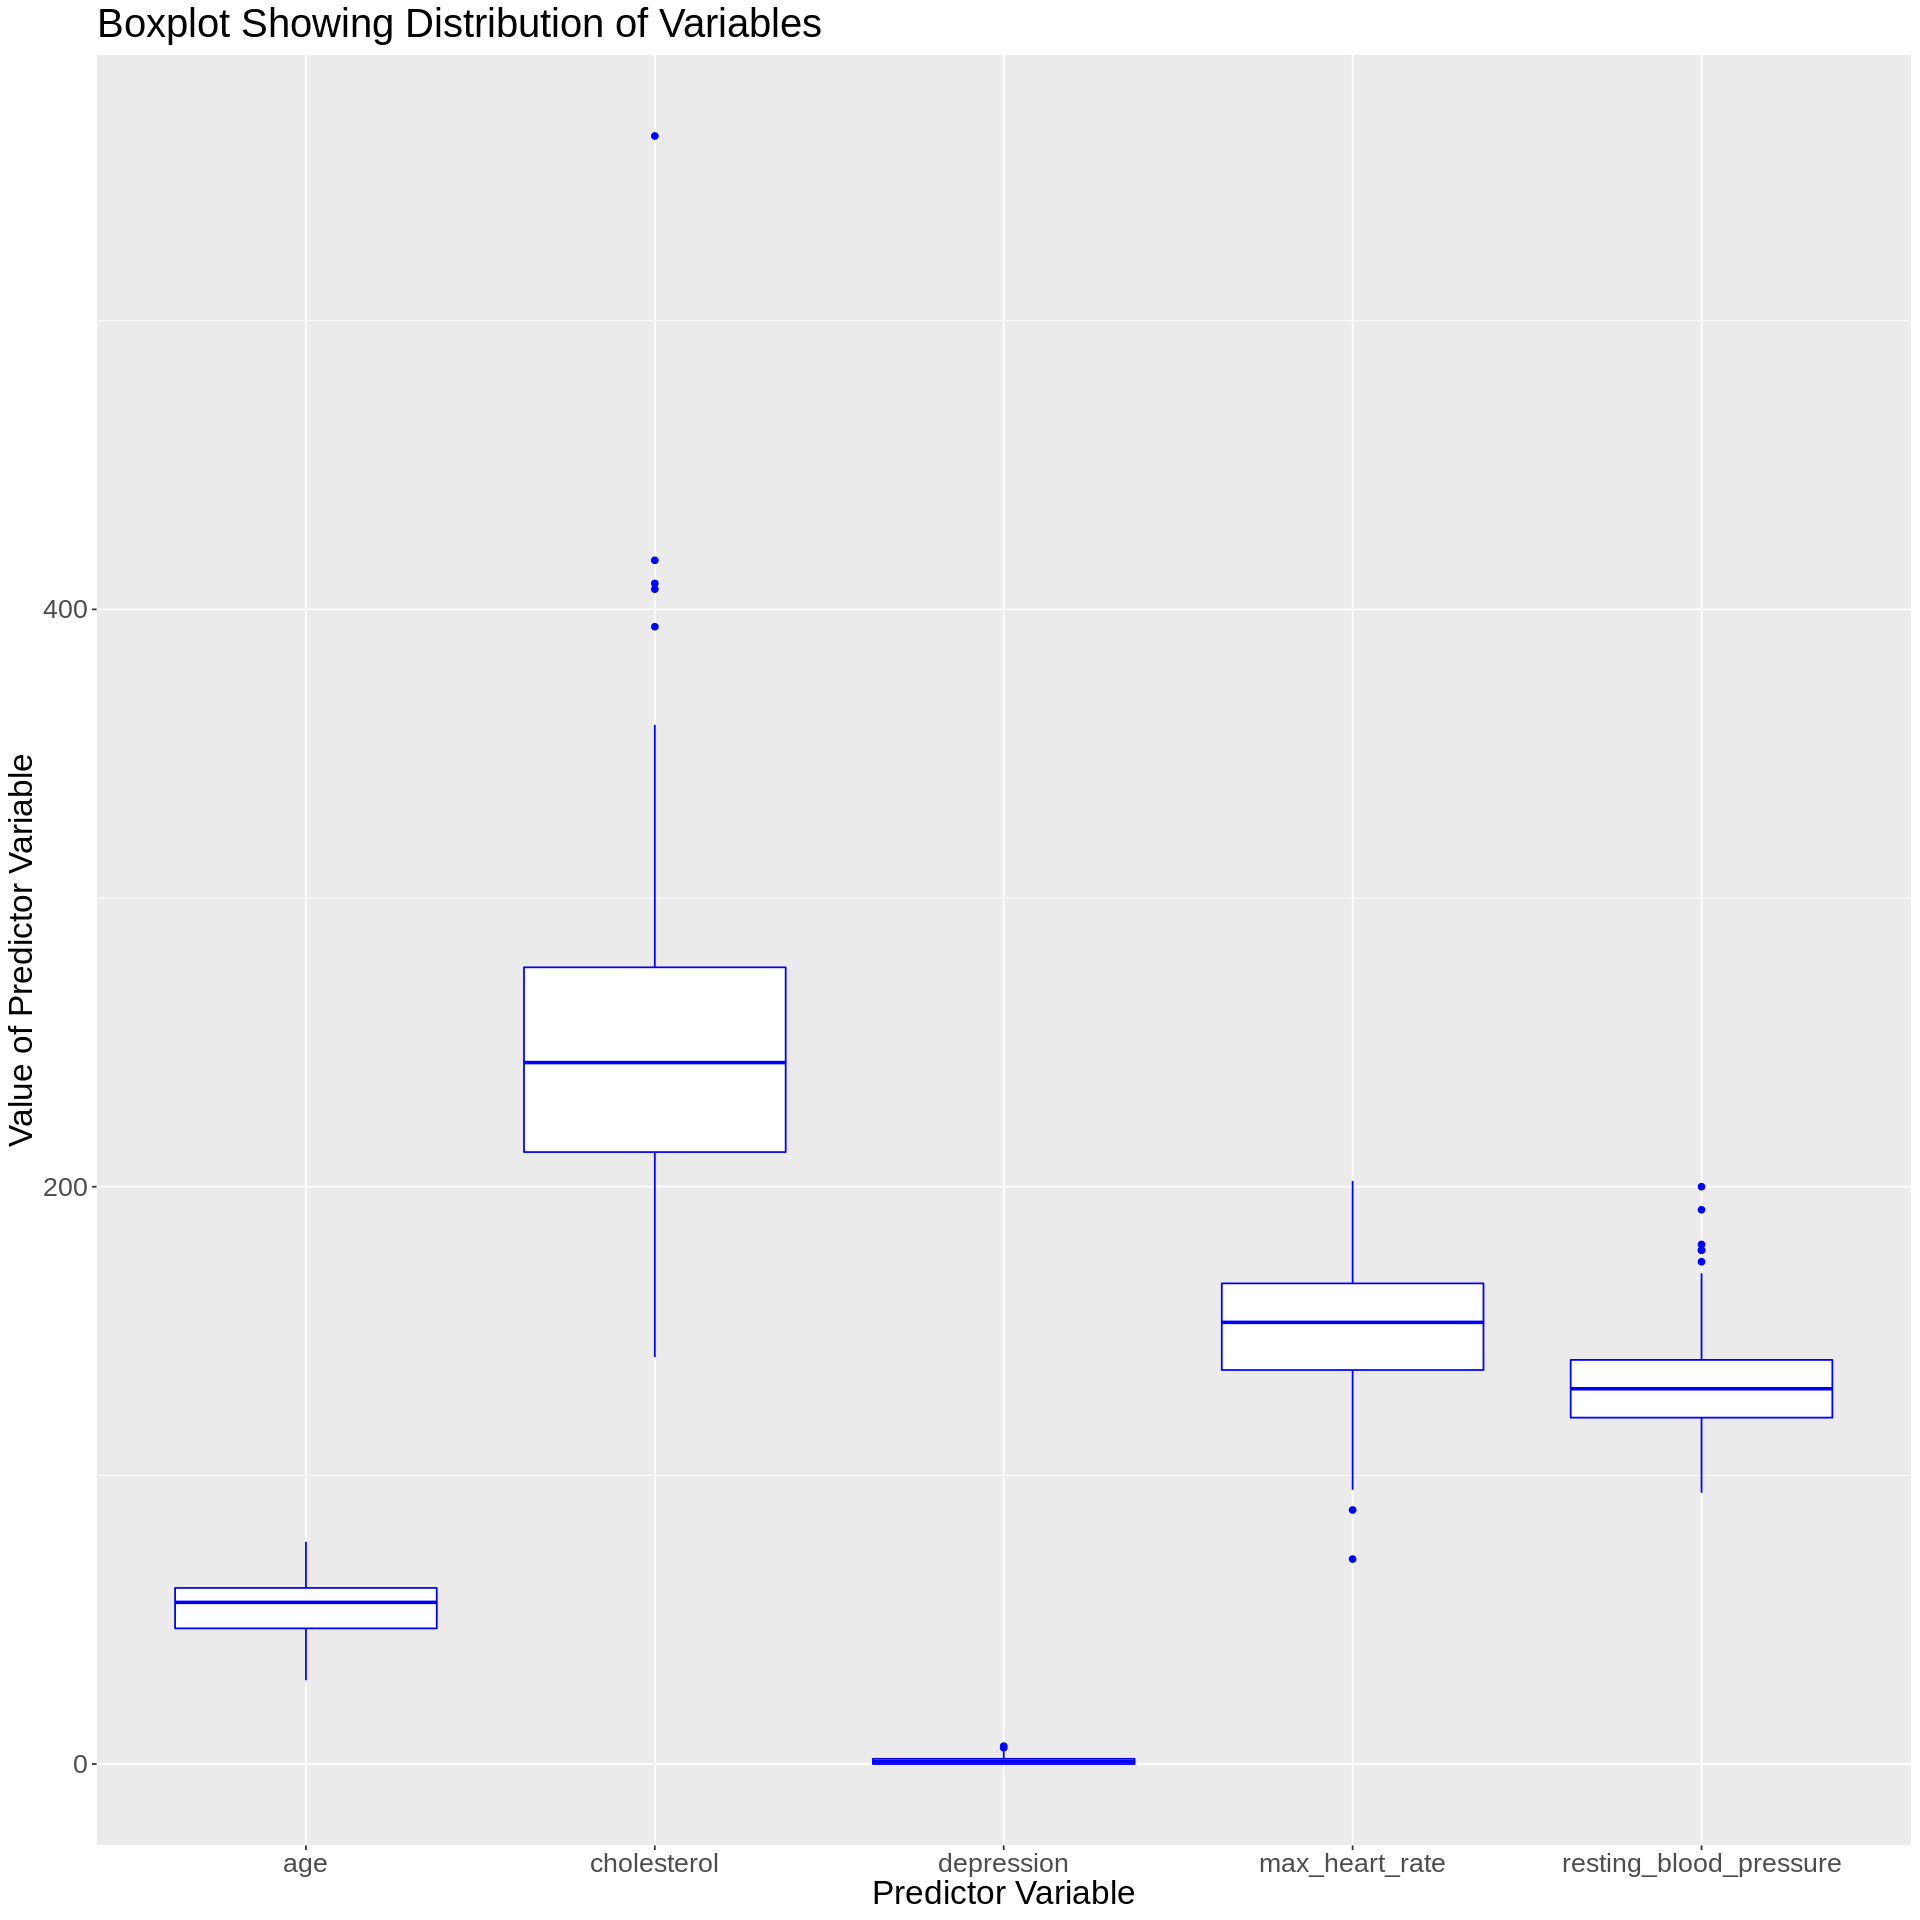

In [18]:
options(repr.plot.width = 16, repr.plot.height = 16)

predictor_variable_boxplot <- heart_data_training_set_adjusted |>
    ggplot(aes(x = variable, y = value)) +
    geom_boxplot(color = "blue") +
    labs(x = "Predictor Variable", y = "Value of Predictor Variable") +
    theme(text = element_text(size = 20)) +
    ggtitle("Boxplot Showing Distribution of Variables")
predictor_variable_boxplot

<font color = purple>
    
## Outcomes and Significance
    
<font color = black>

We expect to be able to classify an individual’s heart disease diagnosis as either positive or negative, based on 5 predictive variables. Such findings could be hugely beneficial to medical centers in need of a quick, but also reliable method of conducting a preliminary analysis on patients. Moreover, the simplicity of this model allows for the general public to assess their risk for heart disease in an effective manner. 

<font color = blue>

### *Future Questions*

<font color = black>
Could machine learning algorithms be accurate enough to innovate the medical industry?
What happens when the algorithm gives a patient a false diagnosis? 
How would this affect the availability and cost of health care around the world?